# Author: Jasneet Kaur Bajaj

# Prediction using Supervised Machine Leaning

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Imporing the relevant libraries

In [71]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [72]:
# Importing the data

scores_df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
scores_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [73]:
# Inspecting the dataframe

scores_df.shape

(25, 2)

In [74]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### **The dataypes of the columns are correct**

In [75]:
scores_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [76]:
# Checking for null values

scores_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### **No null values found in the data**

### Visualising the data

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

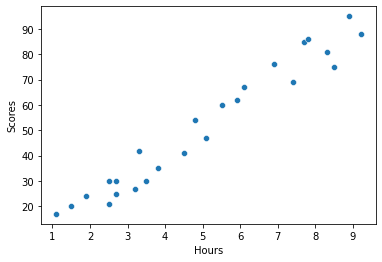

In [77]:
sns.scatterplot(x=scores_df['Hours'], y=scores_df['Scores'])

#### **We see a positive linear relationship between the 2 variables 'Hours' and 'Scores'**

### Building a linear regression model using the statsmodels.api library

#### **Assigning the X (independent) and y (dependent) variables**

In [78]:
X = scores_df['Hours']
y = scores_df['Scores']

#### **Splitting the data into training and test data in the ratio 70:30**

In [79]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [80]:
# Looking at the training data

X_train.head()

6     9.2
12    4.5
4     3.5
24    7.8
0     2.5
Name: Hours, dtype: float64

In [81]:
y_train.head()

6     88
12    41
4     30
24    86
0     21
Name: Scores, dtype: int64

#### **Building the model using statsmodels.api library**

In [82]:
# Adding a constant to the train set

X_train_sm = sm.add_constant(X_train)

In [83]:
# Fitting the regression line using Ordinary Least Squares

lr = sm.OLS(y_train, X_train_sm).fit()

In [84]:
lr.params

const    1.495142
Hours    9.871714
dtype: float64

In [85]:
# Checking the summary

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           1.15e-11
Time:                        08:23:59   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.644      -5.260       8.250
Hours          9.8717      0.540     18.288      0.000       8.721      11.022
==============================================================================
Omnibus:                        4.576   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                1.488
Skew:                          -0.198   Prob(JB):                        0.475
Kurtosis:                       1.606   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### **The model has an R-Squared value of 95.7% and an Adjusted R-Squared value of 95.4%. This means that the model is significant.**

### Visualising the fit of the model on the train set

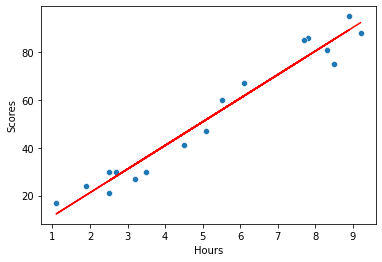

In [86]:
sns.scatterplot(X_train, y_train)
plt.plot(X_train, (1.4951+9.8717*X_train), 'r')
plt.show()

### Making predictions on Test set

In [87]:
X_test_sm = sm.add_constant(X_test)

In [88]:
y_pred = lr.predict(X_test_sm)

In [89]:
y_pred.head()

9     28.148771
22    39.007657
13    34.071800
11    59.738257
5     16.302714
dtype: float64

In [90]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [91]:
# Finding the mean squared error of the test set

np.sqrt(mean_squared_error(y_test, y_pred))

5.067387845160844

In [92]:
# Finding the R-Squared value of the test set

r_squared = r2_score(y_test, y_pred)
r_squared

0.9309458862687437

### Visualising the fit of the model on the test set

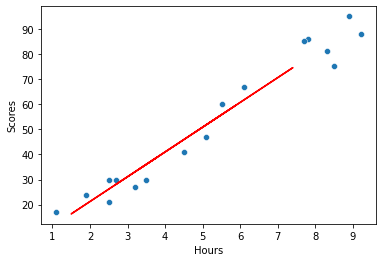

In [93]:
sns.scatterplot(X_train, y_train)
plt.plot(X_test, (1.4951+9.8717*X_test), 'r')
plt.show()

In [94]:
# Printing the constant and coefficient of hours

lr.params

const    1.495142
Hours    9.871714
dtype: float64

### Predicting score of the students if they study for 9.25 hours a day

#### y = mx + c

#### m = 9.8717
#### x = 9.25
#### c = 1.4951

#### Therefore substituting these values in the linear equation we can find the predicted scores if a student studies for 9.25 hours

In [96]:
y = 9.8717*9.25 + 1.4951
print (f'Predicted score if a student studies for 9.25 hours is {y}')

Predicted score if a student studies for 9.25 hours is 92.808325
